# Intro

Type a player name, get his stats

# 1. Get Team URLs

In [103]:
import requests
from bs4 import BeautifulSoup


In [104]:
standings_url = "https://fbref.com/en/comps/9/Premier-League-Stats"
data = requests.get(standings_url)
# data.text

In [105]:
soup = BeautifulSoup(data.text)


In [106]:
standings_table = soup.select('table.stats_table')[0]
standings_table

<table class="stats_table sortable min_width force_mobilize" data-cols-to-freeze=",2" id="results2023-202491_overall"> <caption>Regular season Table</caption> <colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup> <thead> <tr> <th aria-label="Rank" class="poptip sort_default_asc center" data-stat="rank" data-tip="&lt;strong&gt;Rank&lt;/strong&gt;&lt;br&gt;Squad finish in competition&lt;br&gt;Finish within the league or competition.&lt;br&gt;For knockout competitions may show final round reached.&lt;br&gt;Colors and arrows represent promotion/relegation or qualifiation for continental cups.&lt;br&gt;Trophy indicates team won league whether by playoffs or by leading the table.&lt;br&gt;Star indicates topped table in league USING another means of naming champion." scope="col">Rk</th> <th aria-label="Squad" class="poptip sort_default_asc center" data-stat="team" scope="col">Squad</th> <th aria-label="Mat

In [107]:
links = standings_table.find_all('a')
links = [l.get('href') for l in links]
links = [l for l in links if '/squads/' in l]
links


['/en/squads/18bb7c10/Arsenal-Stats',
 '/en/squads/b8fd03ef/Manchester-City-Stats',
 '/en/squads/822bd0ba/Liverpool-Stats',
 '/en/squads/8602292d/Aston-Villa-Stats',
 '/en/squads/361ca564/Tottenham-Hotspur-Stats',
 '/en/squads/19538871/Manchester-United-Stats',
 '/en/squads/b2b47a98/Newcastle-United-Stats',
 '/en/squads/7c21e445/West-Ham-United-Stats',
 '/en/squads/cff3d9bb/Chelsea-Stats',
 '/en/squads/8cec06e1/Wolverhampton-Wanderers-Stats',
 '/en/squads/4ba7cbea/Bournemouth-Stats',
 '/en/squads/d07537b9/Brighton-and-Hove-Albion-Stats',
 '/en/squads/fd962109/Fulham-Stats',
 '/en/squads/47c64c55/Crystal-Palace-Stats',
 '/en/squads/d3fd31cc/Everton-Stats',
 '/en/squads/cd051869/Brentford-Stats',
 '/en/squads/e4a775cb/Nottingham-Forest-Stats',
 '/en/squads/e297cd13/Luton-Town-Stats',
 '/en/squads/943e8050/Burnley-Stats',
 '/en/squads/1df6b87e/Sheffield-United-Stats']

In [108]:
team_urls = [f"https://fbref.com{l}" for l in links]
team_urls

['https://fbref.com/en/squads/18bb7c10/Arsenal-Stats',
 'https://fbref.com/en/squads/b8fd03ef/Manchester-City-Stats',
 'https://fbref.com/en/squads/822bd0ba/Liverpool-Stats',
 'https://fbref.com/en/squads/8602292d/Aston-Villa-Stats',
 'https://fbref.com/en/squads/361ca564/Tottenham-Hotspur-Stats',
 'https://fbref.com/en/squads/19538871/Manchester-United-Stats',
 'https://fbref.com/en/squads/b2b47a98/Newcastle-United-Stats',
 'https://fbref.com/en/squads/7c21e445/West-Ham-United-Stats',
 'https://fbref.com/en/squads/cff3d9bb/Chelsea-Stats',
 'https://fbref.com/en/squads/8cec06e1/Wolverhampton-Wanderers-Stats',
 'https://fbref.com/en/squads/4ba7cbea/Bournemouth-Stats',
 'https://fbref.com/en/squads/d07537b9/Brighton-and-Hove-Albion-Stats',
 'https://fbref.com/en/squads/fd962109/Fulham-Stats',
 'https://fbref.com/en/squads/47c64c55/Crystal-Palace-Stats',
 'https://fbref.com/en/squads/d3fd31cc/Everton-Stats',
 'https://fbref.com/en/squads/cd051869/Brentford-Stats',
 'https://fbref.com/en/s

## 2. Store Squads and Team
We got the team url. Access one by one and get the squad list, store them to csv file


In [109]:
import pandas as pd
import time
from io import StringIO

In [110]:
squad_dfs = []

In [111]:
for team_url in team_urls:
    data = requests.get(team_url)
    squads = pd.read_html(StringIO(data.text), match="Standard Stats")[0]
    squads = squads.droplevel(level=0,axis=1)
    
    # Get team name
    team_name = team_url.split("/")[-1].replace("-Stats", "").replace("-", " ")
    # Add a column team_name
    squads['team'] = team_name
    
    # Change index to lower case
    squads.columns = [c.lower() for c in squads.columns]
    squad_dfs.append(squads)
    
    time.sleep(1)

In [112]:
len(squad_dfs)

20

We got all premier teams' squads, so merge them into a single dataframe.

But before that, let's drop last 2 rows and store them as separate data frame because it stores info about squad and opponent


In [113]:
df = squad_dfs[0]


In [114]:
df.tail(2)

,player,nation,pos,age,mp,starts,min,90s,gls,ast,...,g+a,g-pk,g+a-pk,xg,xag,xg+xag,npxg,npxg+xag,matches,team
32,Squad Total,NaN,NaN,25.7,34,374,3060.0,34.0,78.0,55.0,...,3.91,2.03,3.65,1.98,1.41,3.40,1.78,3.19,NaN,Arsenal
33,Opponent Total,NaN,NaN,27.0,34,374,3060.0,34.0,25.0,20.0,...,1.32,0.71,1.29,0.71,0.52,1.23,0.66,1.19,NaN,Arsenal


Store player name, team name, position, age, nationality as a CSV file.
So that when we search player name, we can just search CSV file and CSV file can be manually updated by running scaraping python file to prevent over-traffic.

# 3. Squad Info about each team
## 3 - 1. Merging Data Frame into a single df

In [115]:
squad_rows = []
for df in squad_dfs:
    squad_row = df.iloc[-2]
    squad_rows.append(squad_row)

In [116]:
squad_df = pd.concat(squad_rows, axis=1).T



- Drop redundant columns like nation, pos etc.. and set 'team' column as an index column

In [117]:
squad_df=squad_df.dropna(axis=1)

In [118]:
squad_df.set_index('team', inplace=True)
squad_df

,player,age,mp,starts,min,90s,gls,ast,g+a,g-pk,...,gls,ast,g+a,g-pk,g+a-pk,xg,xag,xg+xag,npxg,npxg+xag
team,,,,,,,,,,,,,,,,,,,,,
Arsenal,Squad Total,25.7,34,374,3060.0,34.0,78.0,55.0,133.0,69.0,...,2.29,1.62,3.91,2.03,3.65,1.98,1.41,3.4,1.78,3.19
Manchester City,Squad Total,27.3,33,363,2970.0,33.0,78.0,57.0,135.0,73.0,...,2.36,1.73,4.09,2.21,3.94,2.07,1.59,3.67,1.94,3.53
Liverpool,Squad Total,27.1,35,385,3150.0,35.0,72.0,55.0,127.0,66.0,...,2.06,1.57,3.63,1.89,3.46,2.24,1.64,3.88,2.03,3.67
Aston Villa,Squad Total,27.6,35,385,3150.0,35.0,69.0,52.0,121.0,65.0,...,1.97,1.49,3.46,1.86,3.34,1.69,1.27,2.96,1.6,2.87
Tottenham Hotspur,Squad Total,25.9,32,352,2880.0,32.0,60.0,51.0,111.0,59.0,...,1.87,1.59,3.47,1.84,3.44,1.73,1.48,3.22,1.71,3.19
Manchester United,Squad Total,26.9,34,374,3060.0,34.0,52.0,33.0,85.0,46.0,...,1.53,0.97,2.5,1.35,2.32,1.55,1.1,2.65,1.39,2.49
Newcastle United,Squad Total,28.0,34,374,3060.0,34.0,72.0,47.0,119.0,64.0,...,2.12,1.38,3.5,1.88,3.26,1.9,1.26,3.16,1.71,2.97
West Ham United,Squad Total,29.0,35,385,3150.0,35.0,54.0,39.0,93.0,50.0,...,1.54,1.11,2.66,1.43,2.54,1.37,0.92,2.29,1.26,2.17
Chelsea,Squad Total,25.0,33,363,2970.0,33.0,62.0,40.0,102.0,51.0,...,1.88,1.21,3.09,1.55,2.76,1.93,1.3,3.23,1.65,2.94


## 3 - 2. Draw a graph
- We can draw a graph to compare avg age of premier league players' age

In [119]:
import matplotlib.pyplot as plt

We need to change a data type...

In [120]:
squad_df.head()

,player,age,mp,starts,min,90s,gls,ast,g+a,g-pk,...,gls,ast,g+a,g-pk,g+a-pk,xg,xag,xg+xag,npxg,npxg+xag
team,,,,,,,,,,,,,,,,,,,,,
Arsenal,Squad Total,25.7,34,374,3060.0,34.0,78.0,55.0,133.0,69.0,...,2.29,1.62,3.91,2.03,3.65,1.98,1.41,3.4,1.78,3.19
Manchester City,Squad Total,27.3,33,363,2970.0,33.0,78.0,57.0,135.0,73.0,...,2.36,1.73,4.09,2.21,3.94,2.07,1.59,3.67,1.94,3.53
Liverpool,Squad Total,27.1,35,385,3150.0,35.0,72.0,55.0,127.0,66.0,...,2.06,1.57,3.63,1.89,3.46,2.24,1.64,3.88,2.03,3.67
Aston Villa,Squad Total,27.6,35,385,3150.0,35.0,69.0,52.0,121.0,65.0,...,1.97,1.49,3.46,1.86,3.34,1.69,1.27,2.96,1.6,2.87
Tottenham Hotspur,Squad Total,25.9,32,352,2880.0,32.0,60.0,51.0,111.0,59.0,...,1.87,1.59,3.47,1.84,3.44,1.73,1.48,3.22,1.71,3.19


In [121]:
squad_df["age"] = squad_df['age'].astype(float)

In [127]:
squad_df.dtypes

player       object
age         float64
mp           object
starts       object
min          object
90s          object
gls          object
ast          object
g+a          object
g-pk         object
pk           object
pkatt        object
crdy         object
crdr         object
xg           object
npxg         object
xag          object
npxg+xag     object
prgc         object
prgp         object
prgr         object
gls          object
ast          object
g+a          object
g-pk         object
g+a-pk       object
xg           object
xag          object
xg+xag       object
npxg         object
npxg+xag     object
dtype: object

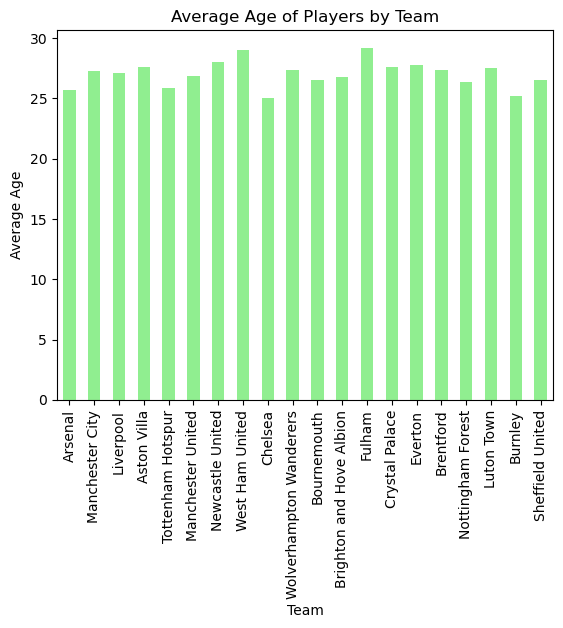

In [131]:
ax = squad_df['age'].plot(kind='bar',  color='lightgreen')

# Set the title and labels
plt.title('Average Age of Players by Team')
plt.xlabel('Team')
plt.ylabel('Average Age')


# for i, val in enumerate(df['age']):
#     ax.text(i, val, str(val), ha='center', va='bottom')
# plt.xticks(rotation=0)
# Show the plot
plt.show()

In [123]:
def scrapeStats():
    # league = input("Enter League Here (EPL, Ligue 1, Bundesliga, Serie A, La Liga). Press Enter when ready: ")
    league = "EPL"
    
    
    
    

In [124]:
def extract_player_stats(player_link, player_file_name):
    pass

# Objectives
1. Squad avg age
2. Player search -> give stats
3. Player expetation performance...? (Based on his team, position, last few seasons, matches etc..?)
